## Overview

The goal of this notebook is to provide a comprehensive guide for running and producing tail latency results on any local devices.

## Setup

First we need to download git repositories and dependent libraires to run this notebook.

Follow the instructions on the README.md on this repo https://github.com/gatech-sysml/ofa_transformers_runfiles/tree/master

If read access is required for this repository, please email ilee300@gatech.edu

## Run latency experiment

In [49]:
! python ../runscripts/sample.py

hello world
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial1
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial2


The system cannot find the path specified.


C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial3
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial4
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial5
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial6
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial7
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial8
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial9
C:\irenestuff\ofa_workspace\ofa_transformers_runfiles\runscripts\outputs\Trial10


In [ ]:
!python ../runscripts/perf_eval.py

***optionally run the file inside a tmux instead to preserve session***

## Print out graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os
import sys; sys.path.append('../runscripts')
import utils

In [2]:
# Make sure to set num trials to match the num trials variable you used in perf_eval
NUM_TRIALS = 5
BATCH_SIZE = 32
dir_name = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()),"..","runscripts","outputs"))
dir_name

'/home/sreddy65/ofa_transformers_runfiles/runscripts/outputs'

In [5]:
def create_graph(input_list,labels, title, fig_name, figsize=(20, 10), remove_tail=False):
    plt.clf()
    plt.rcParams["figure.figsize"] = figsize
    plt.rcParams["figure.autolayout"] = True
    for i in range(len(input_list)):
        trial_data=[]
        gpu_stds = []
        gpu_means = []
        for j in range(1,NUM_TRIALS+1):
            log_dir = os.path.join(dir_name,"Trial"+str(j),input_list[i]+"_time_stamp.log")
            data_file = pd.read_csv(log_dir,header=None)
            # inference time
            inf_data = (data_file[0]).tolist()
            count, bins_count = np.histogram(inf_data, bins=50)
            pdf = count / sum(count)
            cdf = np.cumsum(pdf)
            trial_data.append(cdf)
        #calculate the mean and variance
        mean_plot = np.zeros(len(trial_data[0]))
        std_plot = np.zeros(len(trial_data[0]))
        for j in range(len(trial_data[0])):
            each_entry = []
            for k in range(len(trial_data)):
                each_entry.append(trial_data[k][j])
            mean_plot[j] = statistics.mean(each_entry)
            std_plot[j] = statistics.stdev(each_entry)
        std_plot = std_plot / NUM_TRIALS
        plt.errorbar(bins_count[1:],mean_plot,yerr=std_plot,label=labels[i],marker='.')
    plt.xlabel("latency(ms)")
    plt.ylabel("Cumulative Percentage")
    plt.title(title)
    plt.legend()
    plt.savefig(fig_name)
    plt.show()

### Varying Encoder Layer number

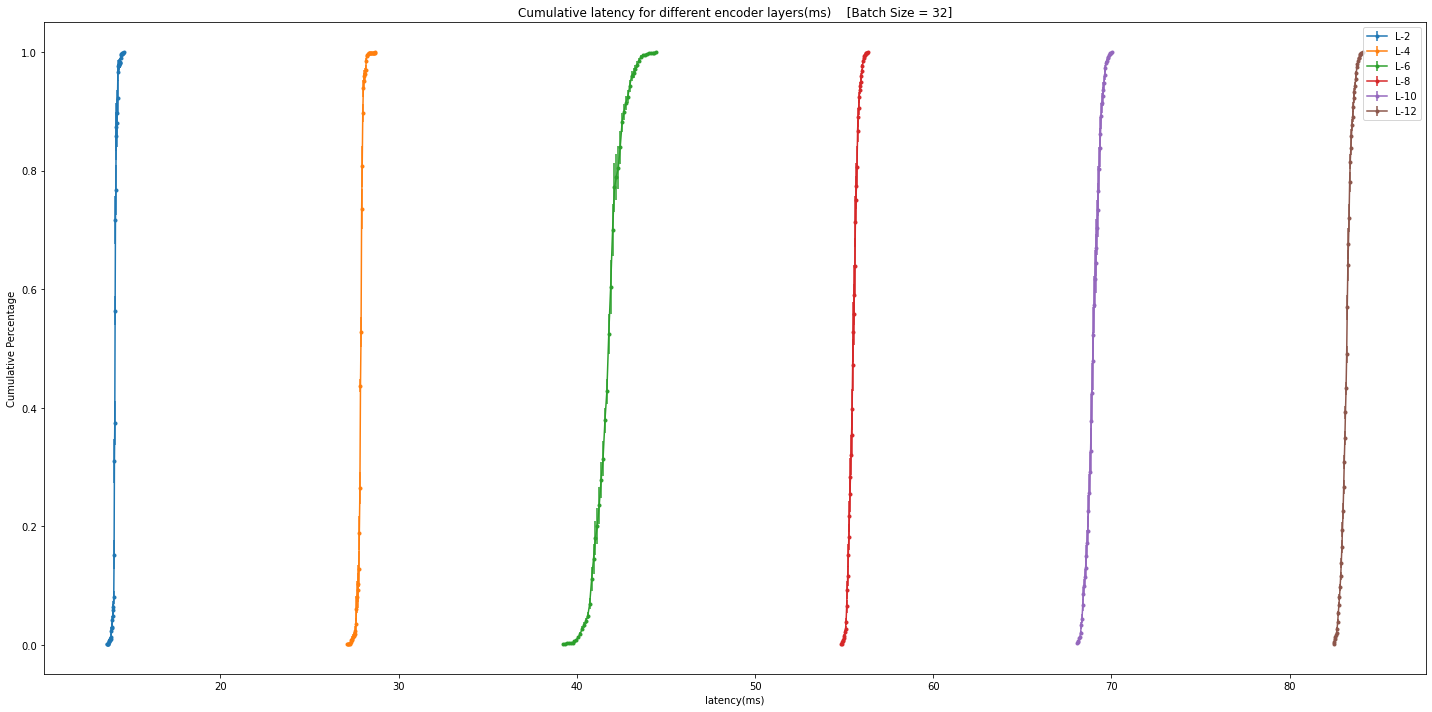

In [16]:
input_list = [x.split("/")[-1] for x in utils.VARY_ENCODER_LAYER]
labels = [x.split('_')[2] for x in input_list]
title = f"Cumulative latency for different encoder layers(ms)    [Batch Size = {BATCH_SIZE}]"
fig_name="encoder_latency.png"
create_graph(input_list,labels, title, fig_name)

### Varying Hidden Dimension Size

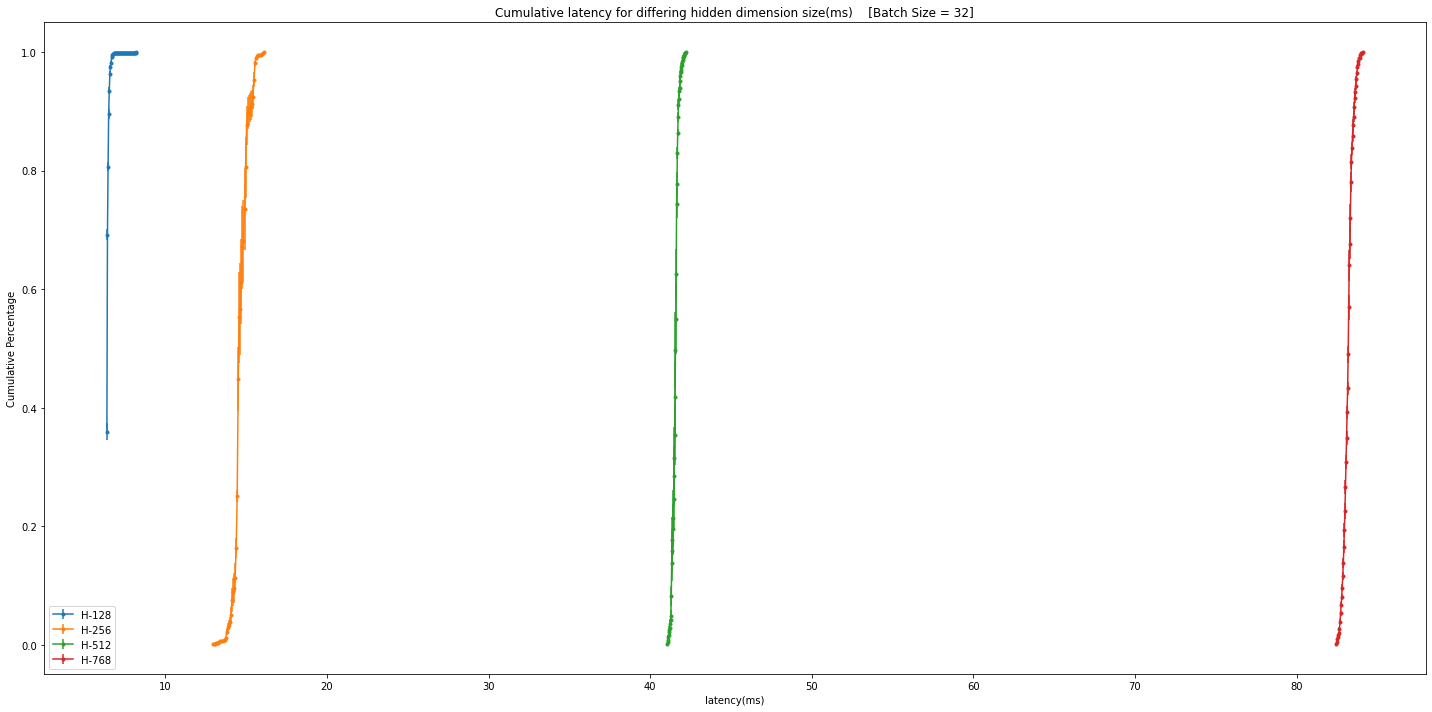

In [17]:
input_list = [x.split("/")[1] for x in utils.VARY_HIDDEN_DIM]
labels= [x.split('_')[3] for x in input_list]
title = f"Cumulative latency for differing hidden dimension size(ms)    [Batch Size = {BATCH_SIZE}]"
fig_name="hidden_dim_latency.png"
create_graph(input_list,labels, title, fig_name)

### Predefined miniatures

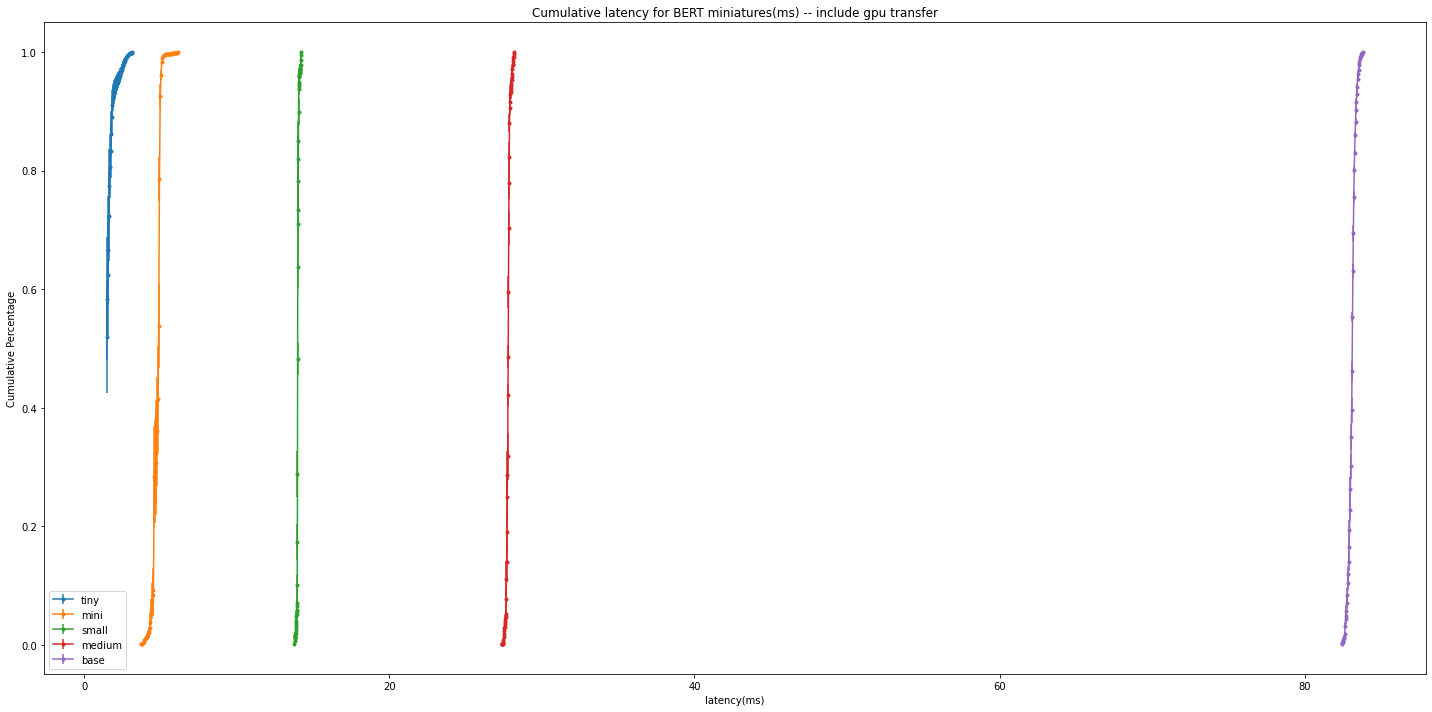

In [8]:
model_list= utils.VARY_MINIATURES
input_list =list(model_list.keys())
labels= input_list
title = "Cumulative latency for BERT miniatures(ms) -- include gpu transfer"
fig_name="miniatures.png"
create_graph(input_list,labels, title, fig_name)

### Approach 1 for Attention Elasticity

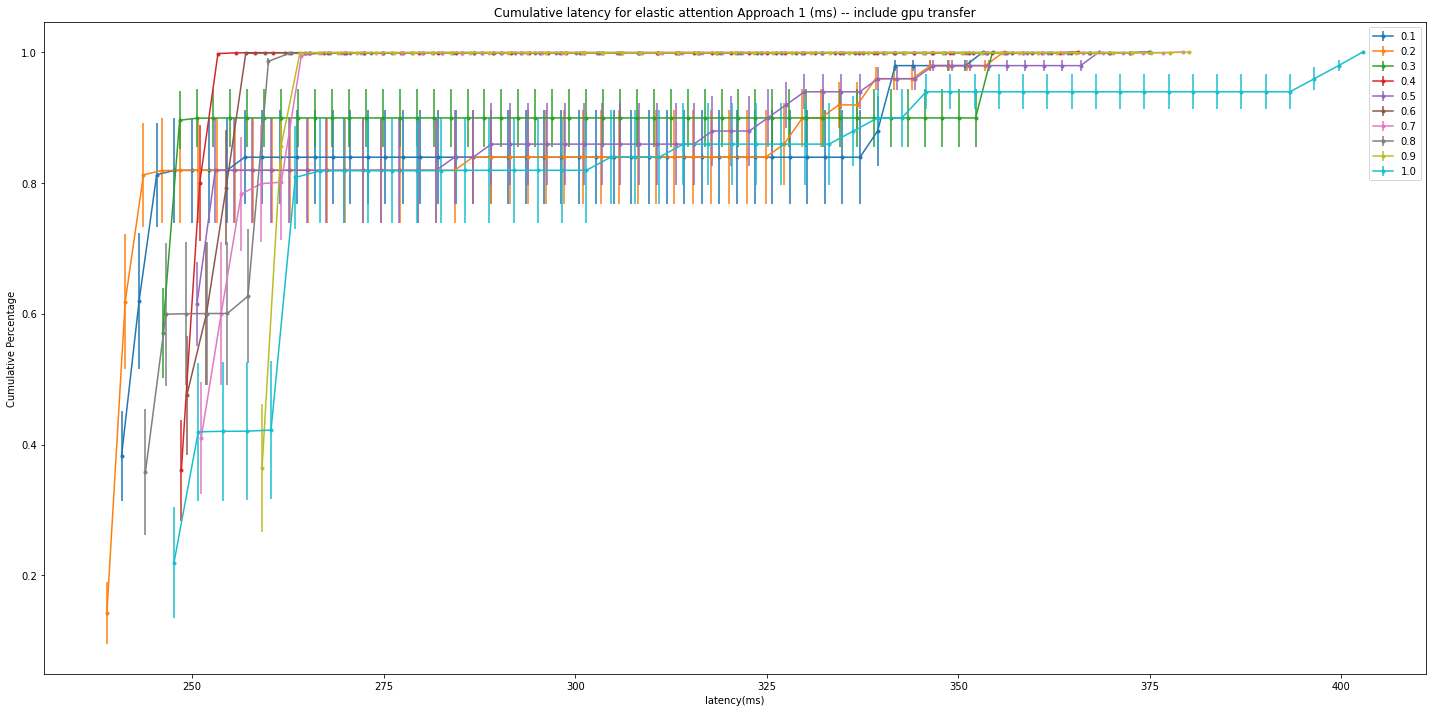

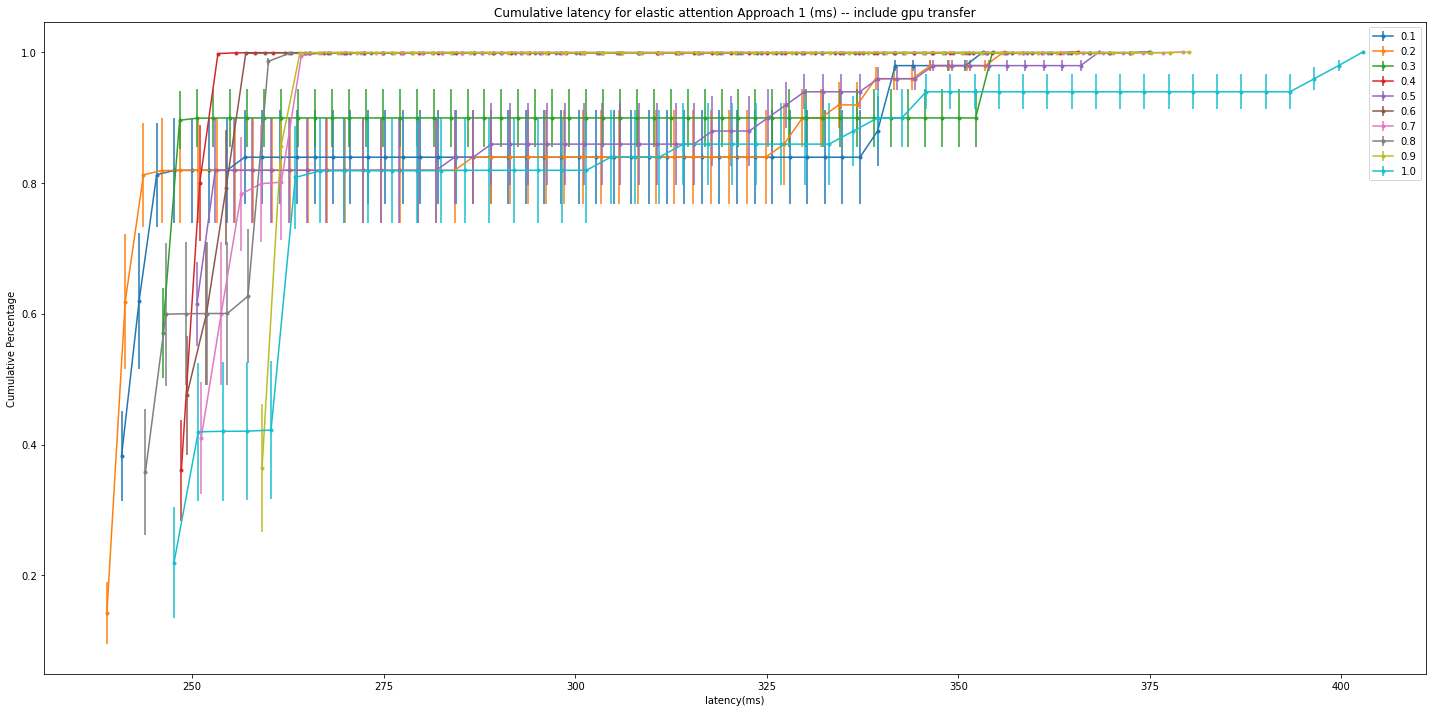

In [9]:
attention_ratio =[str(i/10) for i in range(1,11,1)]
input_list =["attention_1_"+x for x in attention_ratio]
labels= attention_ratio
title = "Cumulative latency for elastic attention Approach 1 (ms) -- include gpu transfer"
fig_name="attention_latency1.png"
create_graph(input_list,labels, title, fig_name)
create_graph(input_list,labels, title, fig_name, remove_tail=True)

### Approach 2 for Attention Elasticity

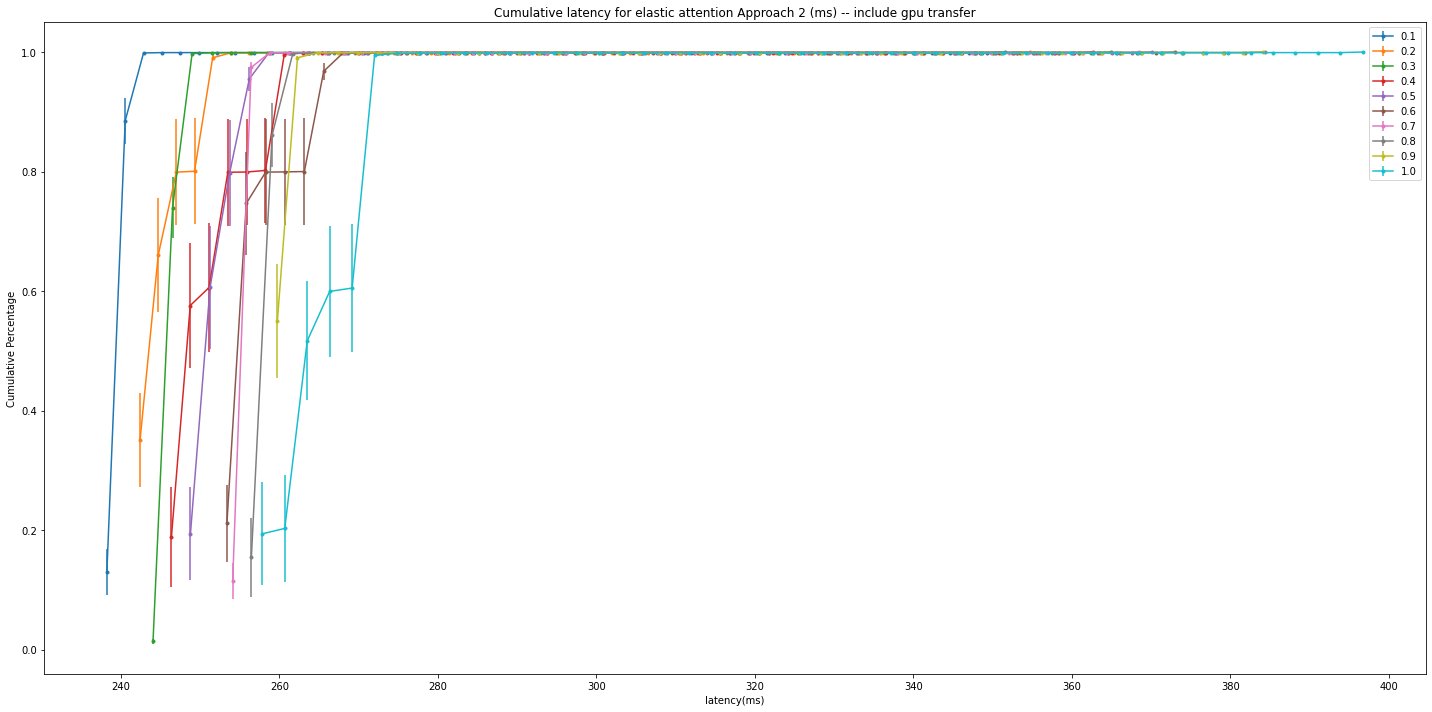

In [10]:
attention_ratio =[str(i/10) for i in range(1,11,1)]
input_list =["attention_2_"+x for x in attention_ratio]
labels= attention_ratio
title = "Cumulative latency for elastic attention Approach 2 (ms) -- include gpu transfer"
fig_name="attention_latency2.png"
create_graph(input_list,labels, title, fig_name)